In [20]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import sklearn.linear_model as linear_model
import seaborn as sns
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

UWU ARIGATO NANDESU


In [21]:
data = pd.read_csv("./covtype.csv")
data.head()

KeyboardInterrupt: 

PERCEPTRON



In [3]:
df= {
    "head": data.head(),
    "columns": data.columns.tolist(),
    "shape": data.shape,
    "info": data.info(buf=None)
}

df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

{'head':    Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
 0       2596      51      3                               258   
 1       2590      56      2                               212   
 2       2804     139      9                               268   
 3       2785     155     18                               242   
 4       2595      45      2                               153   
 
    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
 0                               0                              510   
 1                              -6                              390   
 2                              65                             3180   
 3                             118                             3090   
 4                              -1                              391   
 
    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
 0            221             232            148   
 1            220             235            151   
 2        

GRÁFICA

C:\Users\reyra\AppData\Local\Temp\ipykernel_19280\3424938550.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soil_totals.index, y=soil_totals.values, palette="viridis")


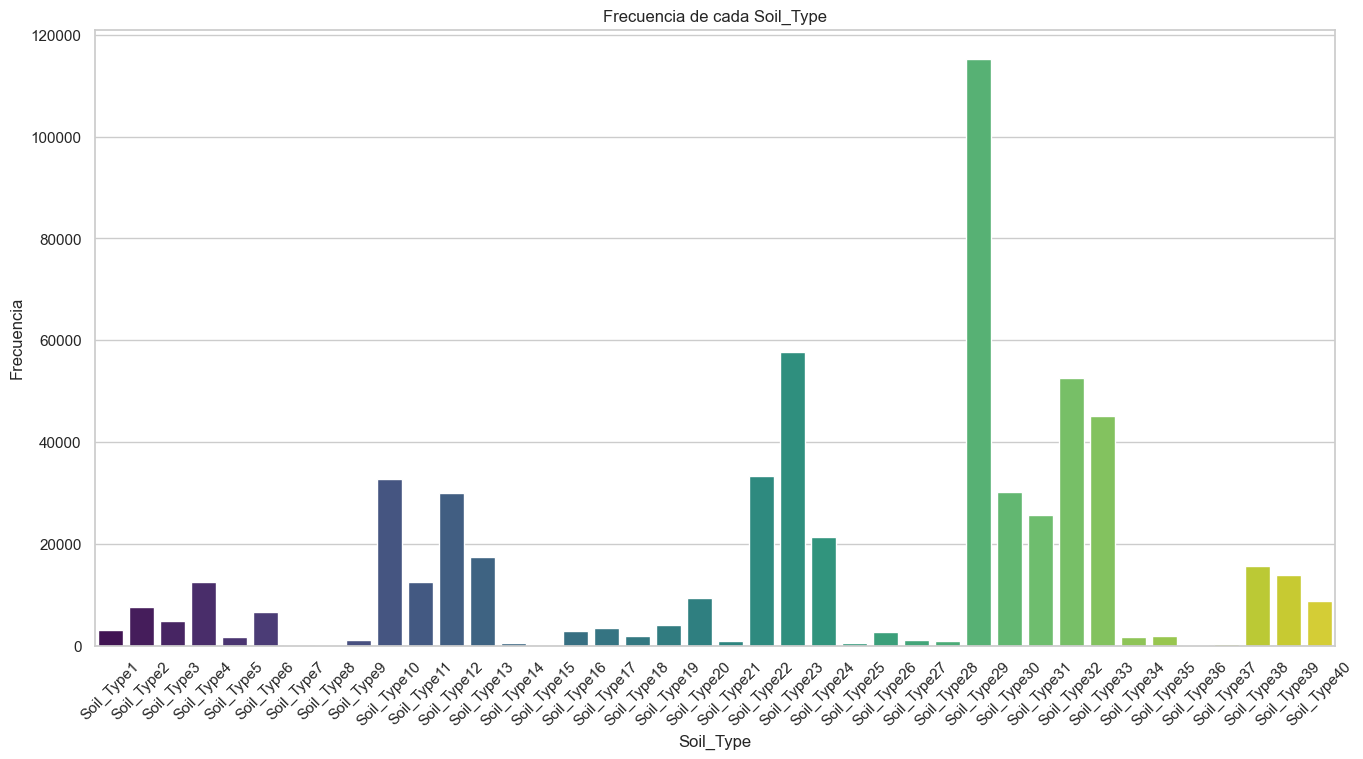

C:\Users\reyra\AppData\Local\Temp\ipykernel_19280\3424938550.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wilderness_totals.index, y=wilderness_totals.values, palette="viridis")


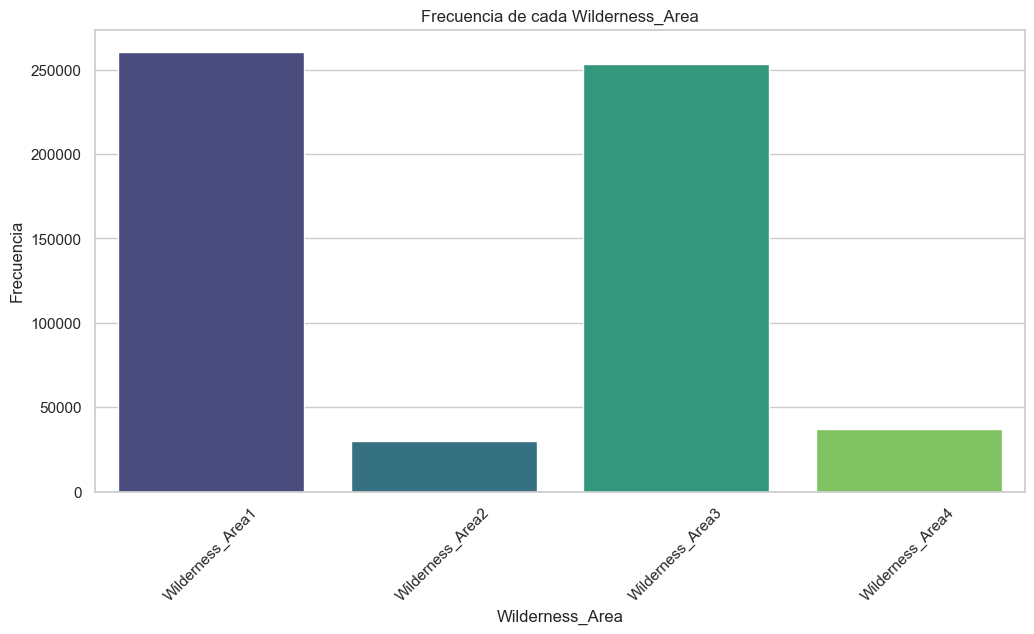

In [4]:
# Obtener información general sobre los datos
# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (16, 8)

# Seleccionar columnas Soil_Type
soil_columns = [col for col in data.columns if col.startswith('Soil_Type')]

# Graficar cada columna Soil_Type por separado en una misma gráfica
soil_data = data[soil_columns]

# Crear un DataFrame con los valores totales para cada Soil_Type
soil_totals = soil_data.sum()

# Graficar barras individuales para cada Soil_Type
plt.figure()
sns.barplot(x=soil_totals.index, y=soil_totals.values, palette="viridis")
plt.title('Frecuencia de cada Soil_Type')
plt.xlabel('Soil_Type')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()
# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Seleccionar columnas Wilderness_Area
wilderness_columns = [col for col in data.columns if col.startswith('Wilderness_Area')]

# Graficar cada columna Wilderness_Area por separado en una misma gráfica
wilderness_data = data[wilderness_columns]

# Crear un DataFrame con los valores totales para cada Wilderness_Area
wilderness_totals = wilderness_data.sum()

# Graficar barras individuales para cada Wilderness_Area
plt.figure()
sns.barplot(x=wilderness_totals.index, y=wilderness_totals.values, palette="viridis")
plt.title('Frecuencia de cada Wilderness_Area')
plt.xlabel('Wilderness_Area')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

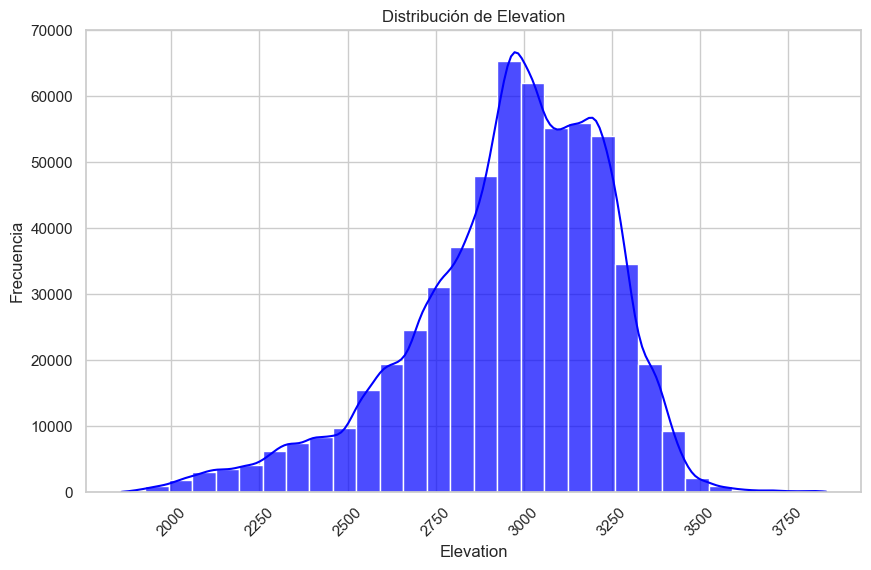

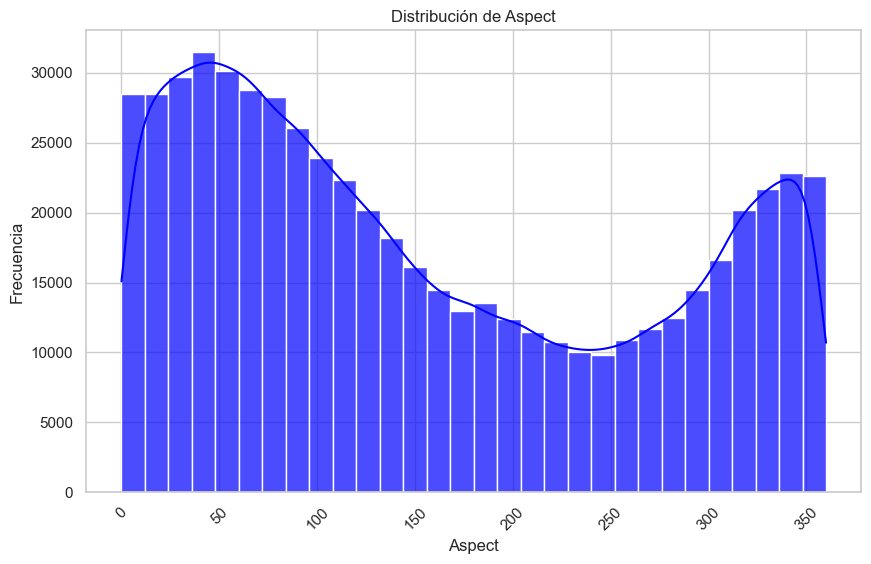

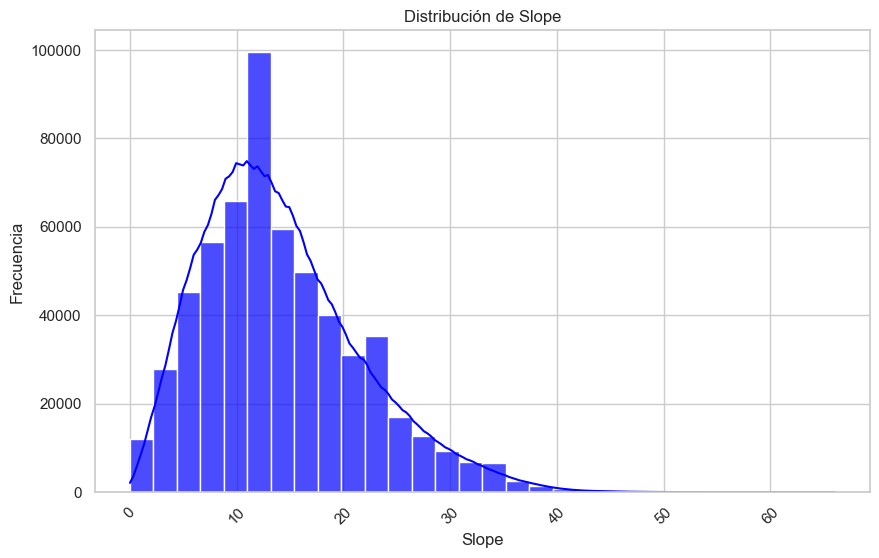

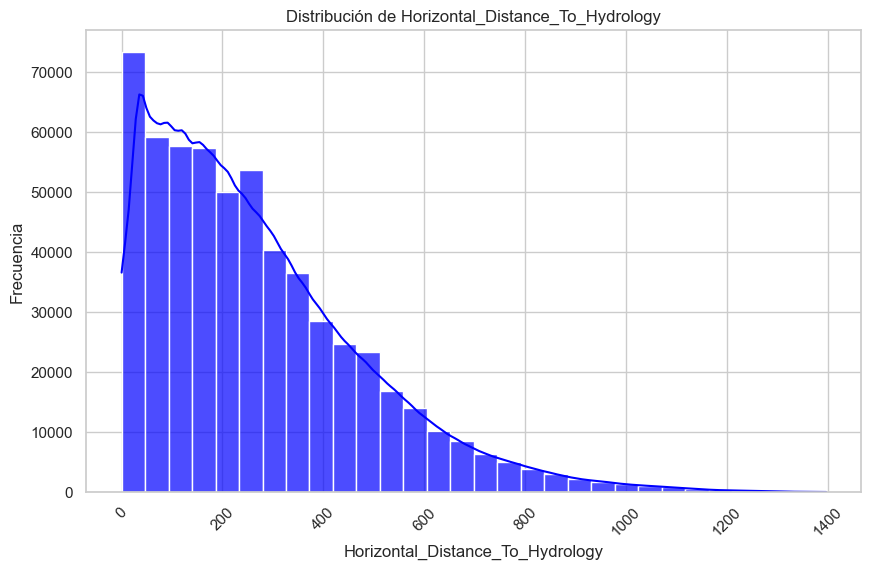

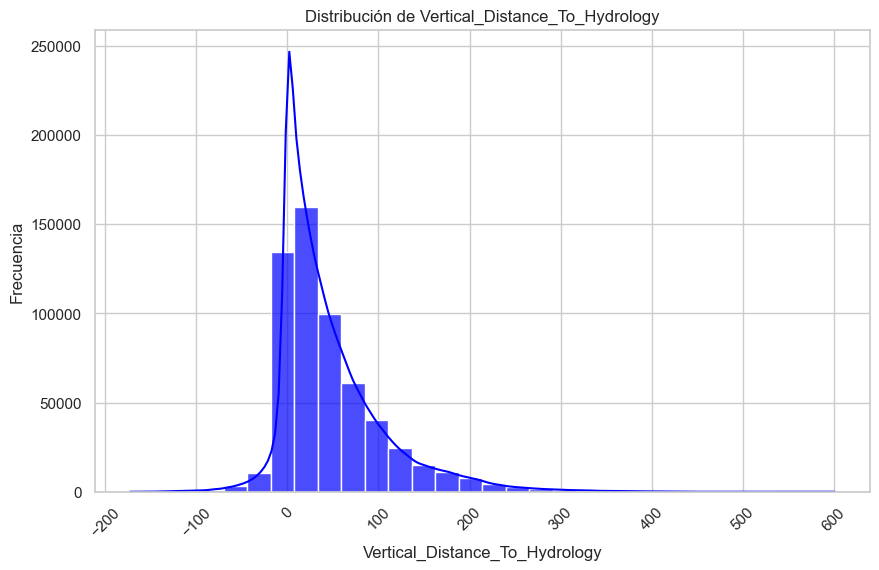

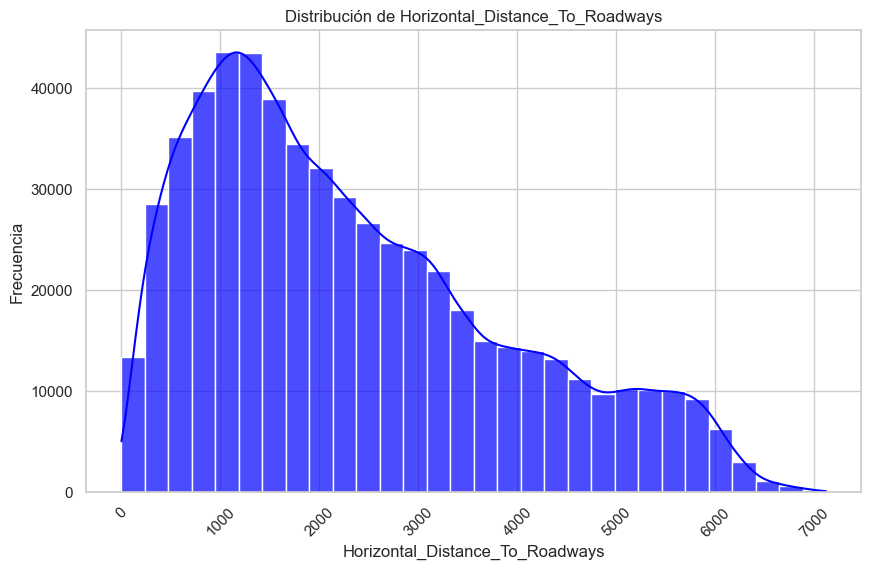

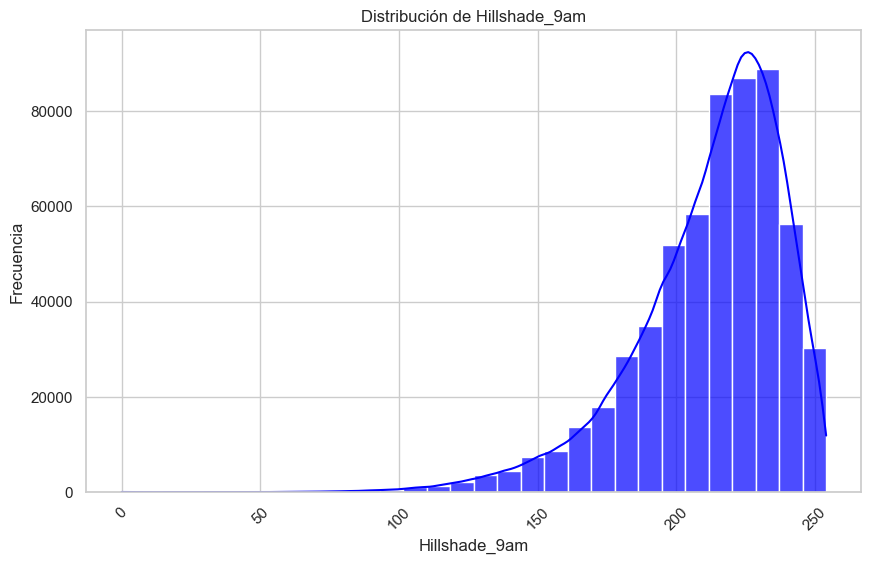

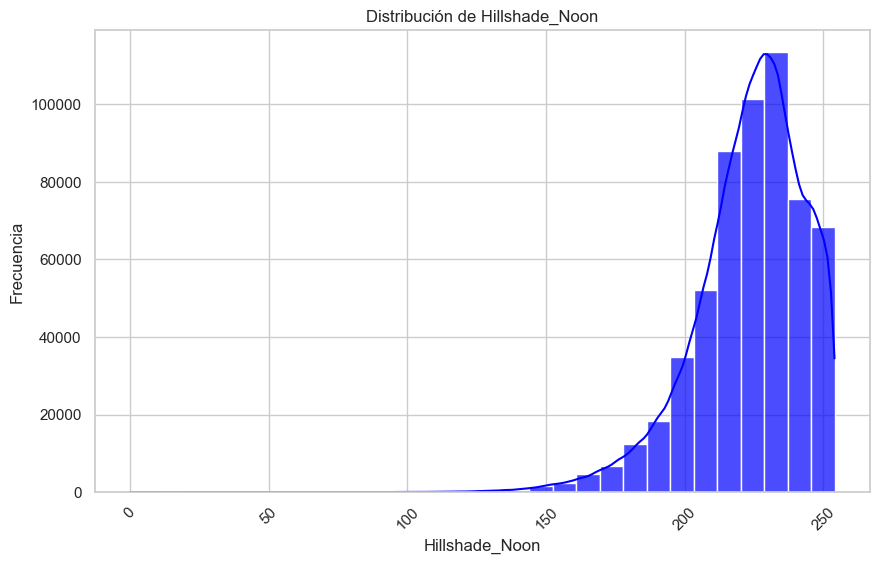

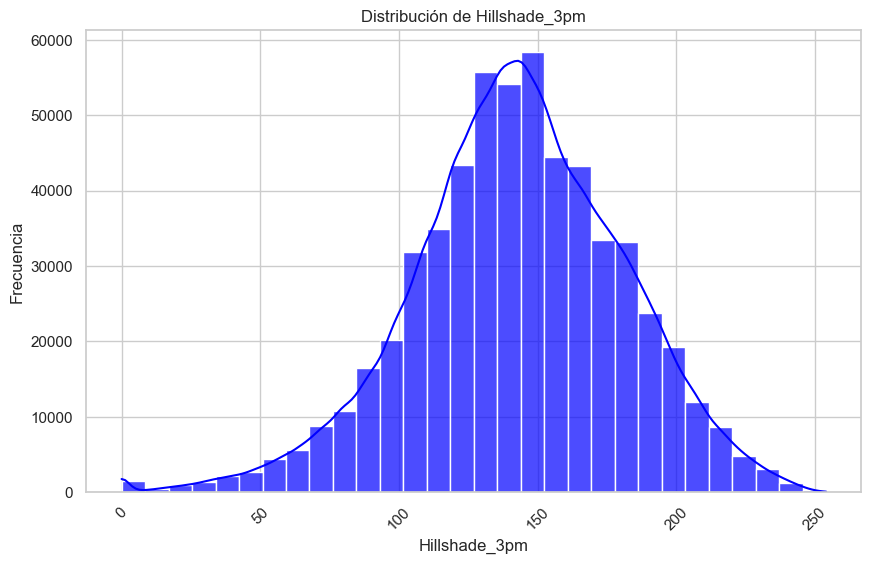

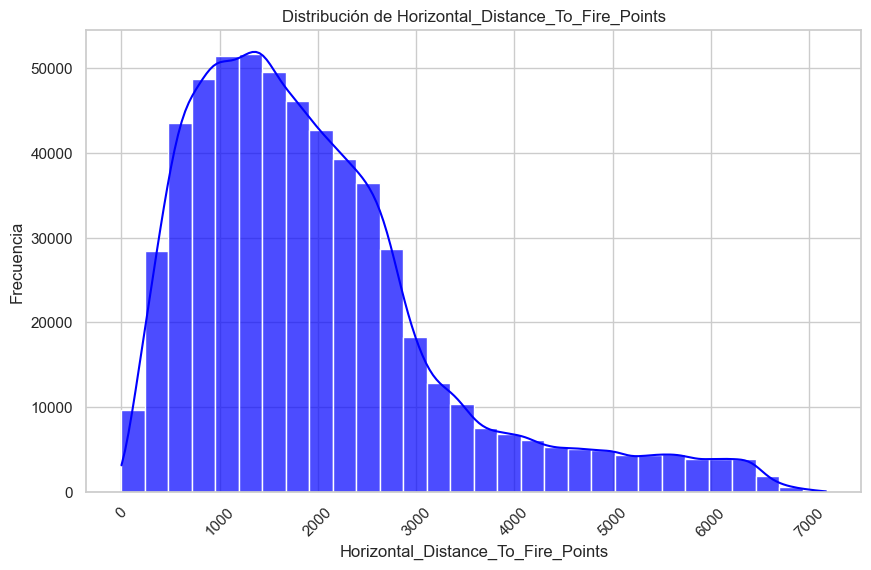

C:\Users\reyra\AppData\Local\Temp\ipykernel_19280\2754032664.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')


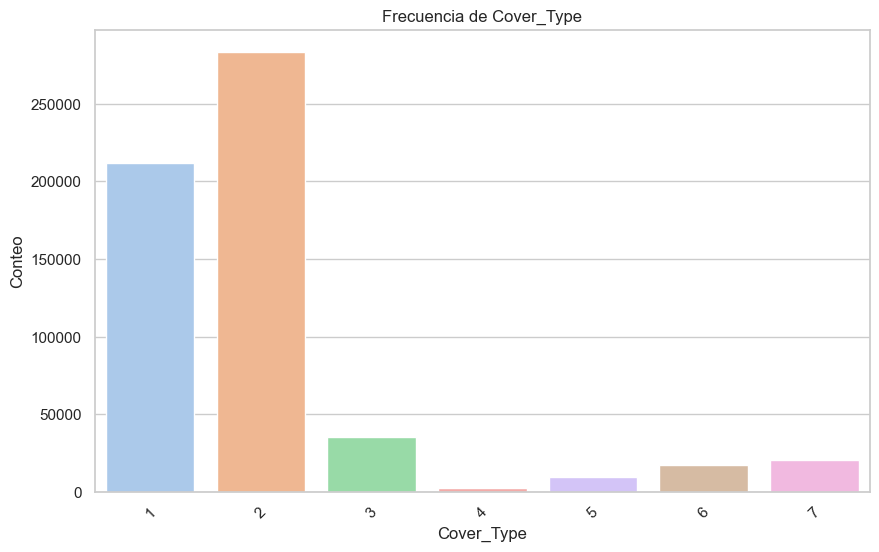

In [5]:
# Configuración general de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Identificar columnas que no sean Soil_Type ni Wilderness_Area
excluded_columns = [col for col in data.columns if col.startswith('Soil_Type') or col.startswith('Wilderness_Area')]
columns_to_plot = [col for col in data.columns if col not in excluded_columns]

# Graficar todas las columnas restantes
for col in columns_to_plot:
    plt.figure()

    # Verificar si la columna tiene pocos valores únicos (categórica)
    if data[col].nunique() < 20:
        sns.countplot(x=data[col], palette='pastel')
        plt.title(f'Frecuencia de {col}')
        plt.xlabel(col)
        plt.ylabel('Conteo')
    else:  # Si no, graficar como numérica
        sns.histplot(data[col], kde=True, bins=30, color='blue', alpha=0.7)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

    plt.xticks(rotation=45)
    plt.show()




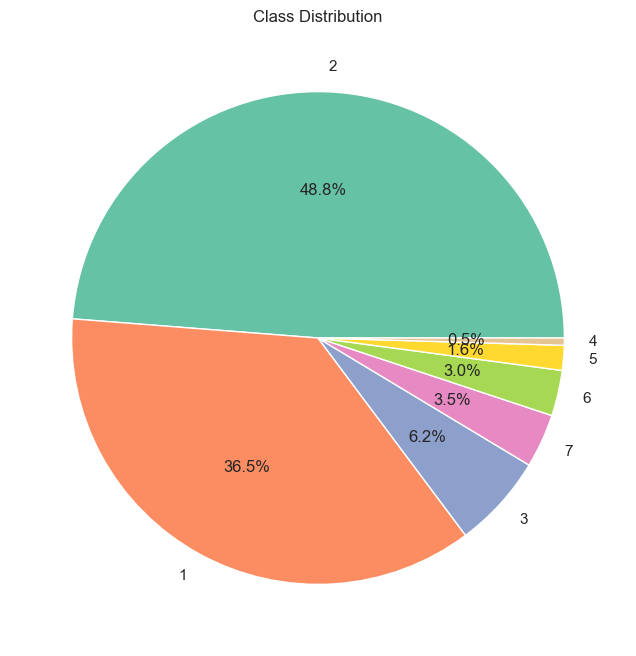

In [6]:
#HAY DATOS DESBALANCEADOS
cmap = sns.color_palette('Set2', as_cmap=True)(np.arange(7))

plt.figure(figsize=(8, 8))
plt.pie(
    data['Cover_Type'].value_counts().values,
    colors=cmap,
    labels=data['Cover_Type'].value_counts().keys(),
    autopct='%.1f%%'
)
plt.title("Class Distribution")
plt.show()

In [30]:
data1 = data.iloc[:, :7]
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']


In [42]:
#Desbalanceo de datos, quitamos muestras de 1 y 2 
def undersample(data):
    # Combinar características y objetivo
    combined = pd.concat([X, y], axis=1)
    # Clase minoritaria (determinada automáticamente)
    min_class_size = combined['Cover_Type'].value_counts().min()
    # Submuestreo de cada clase
    balanced_data = combined.groupby('Cover_Type').apply(
        lambda x: x.sample(min_class_size, random_state=42)
    ).reset_index(drop=True)
    return balanced_data.drop('Cover_Type', axis=1), balanced_data['Cover_Type']

def oversample_with_smote(X, y):
    smote = SMOTE(random_state=42, sampling_strategy='auto')
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

In [43]:
#X_buena,Y_buena=undersample(data1)
X_buena,Y_buena= oversample_with_smote(data,y)

In [48]:
X_buena2=X_buena.iloc[:, :7]

X_train, X_test, y_train, y_test = train_test_split(
    X_buena, Y_buena, test_size=0.33, random_state=42
)
clf = linear_model.Perceptron(tol=1e-9, random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)


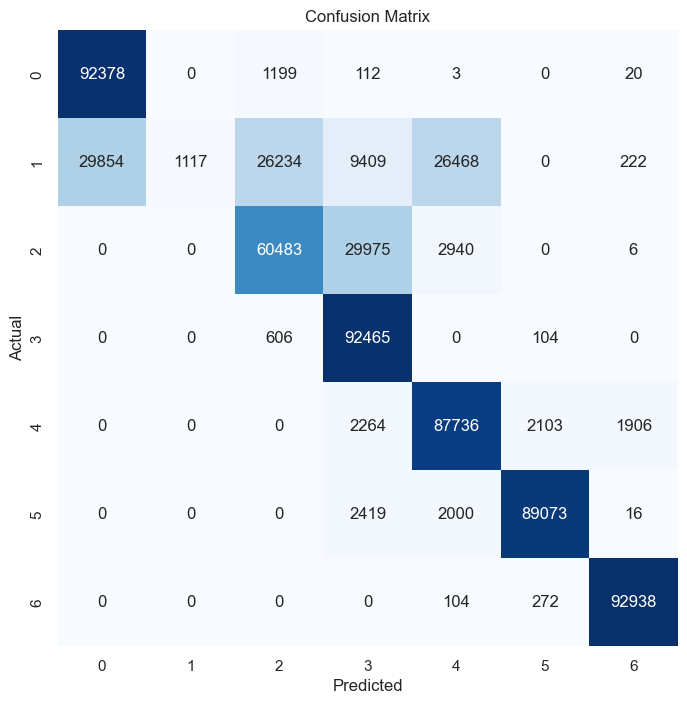

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.76      0.99      0.86     93712
           2       1.00      0.01      0.02     93304
           3       0.68      0.65      0.66     93404
           4       0.68      0.99      0.80     93175
           5       0.74      0.93      0.82     94009
           6       0.97      0.95      0.96     93508
           7       0.98      1.00      0.99     93314

    accuracy                           0.79    654426
   macro avg       0.83      0.79      0.73    654426
weighted avg       0.83      0.79      0.73    654426



In [49]:


cm = confusion_matrix(y_test, pred)
clr = classification_report(y_test, pred)
    
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
    
print("Classification Report:\n----------------------\n", clr)
cm = confusion_matrix(y_test, pred)